In [1]:
import numpy as np                  
import pandas as pd                
import matplotlib.pyplot as plt    
import seaborn as sns
import mysql.connector
from mysql.connector import Error

In [2]:
def cargar_tablas_a_dataframes(host, database, user, password):
    """
    Se conecta a una base de datos MySQL y carga todas las tablas como DataFrames de Pandas
    con nombres dinámicos en el entorno global (ej. df_nombreTabla).
    """
    try:
        connection = mysql.connector.connect(
            host=host,
            database=database,
            user=user,
            password=password
        )

        if connection.is_connected():
            cursor = connection.cursor()  # Creación de un cursor para ejecutar consultas SQL
            cursor.execute("SHOW TABLES")  # Se ejecuta la consulta "SHOW TABLES" para listar las tablas

            tablas = [tabla[0] for tabla in cursor.fetchall()]  # Se obtienen los nombres de las tablas

            for tabla in tablas:
                cursor.execute(f"SELECT * FROM {tabla}")  # Se extraen los datos de cada tabla
                columnas = [columna[0] for columna in cursor.description]  # Nombres de columnas
                globals()[f'df_{tabla}'] = pd.DataFrame(cursor.fetchall(), columns=columnas)  # DataFrame dinámico
                print(f'df_{tabla}')  # Mostrar el nombre del DataFrame creado

    except Error as e:
        print("Error while connecting to MySQL:", e)  # Manejo de errores

    finally:
        if 'connection' in locals() and connection.is_connected():
            cursor.close()  # Cierra el cursor
            connection.close()  # Cierra la conexión
            print("MySQL connection is closed")  # Mensaje de cierre

In [4]:
cargar_tablas_a_dataframes('212.227.90.6', 'Equip_11', 'Equipo11', 'E1q2u3i4p5o11')

df_RRHH
MySQL connection is closed


# Perfil Sociodemográfico

- edad: variable numérica 
- hijos: variable numérica
- nivel educativo: variable categorica

In [ ]:
sociodemografico = df_RRHH[['ID', 'Age', 'Education', 'Son']].drop_duplicates(subset='ID').reset_index(drop=True)
sociodemografico.head()

,ID,Age,Education,Son
0,14,34,1,2
1,36,50,1,1
2,9,58,1,2
3,28,28,1,1
4,11,33,1,2


## Exploratory Data Analysis

* Resúmenes estadísticos

In [14]:
sociodemografico.info()
sociodemografico.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         36 non-null     int64 
 1   Age        36 non-null     int64 
 2   Education  36 non-null     object
 3   Son        36 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.3+ KB


,ID,Age
count,36.000000,36.000000
mean,18.500000,38.333333
std,10.535654,7.917431
min,1.000000,27.000000
25%,9.750000,32.000000
50%,18.500000,37.500000
75%,27.250000,43.000000
max,36.000000,58.000000


* Visualización variables numéricas

Interpretación de grafica - edad


Interpretación de grafica - hijos

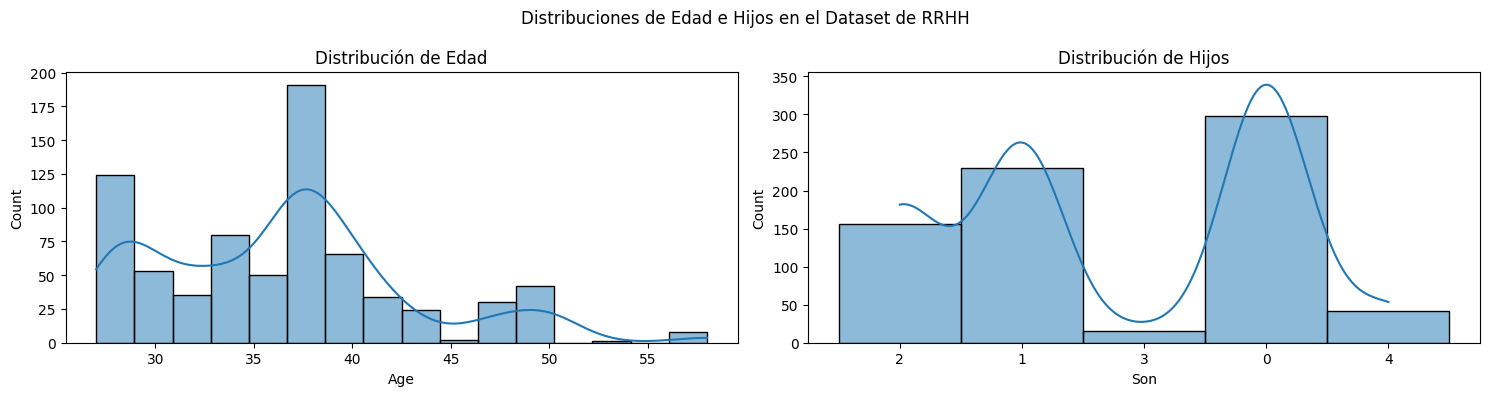

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4))
sns.histplot(df_RRHH['Age'], kde=True, ax=axs[0])
axs[0].set_title("Distribución de Edad")

sns.histplot(df_RRHH['Son'], kde=True, ax=axs[1])
axs[1].set_title("Distribución de Hijos")
plt.suptitle("Distribuciones de Edad e Hijos en el Dataset de RRHH")

plt.tight_layout()
plt.show()

* Visualización variable categórica 'Education'

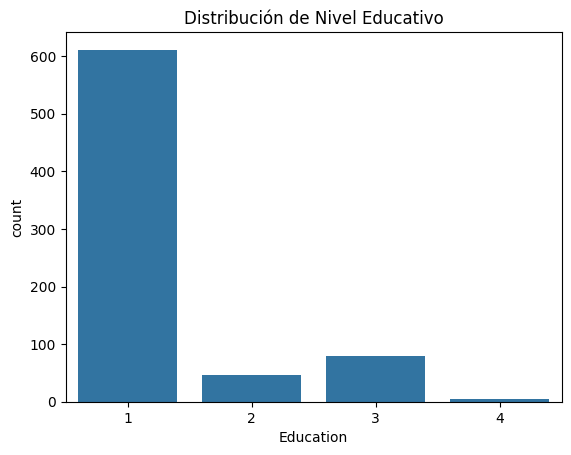

In [19]:
sns.countplot(
    data=df_RRHH,
    x='Education',
    order=[1, 2, 3, 4]
)
plt.title("Distribución de Nivel Educativo")
plt.show()